# Session 1
Exploratory data analysis using python to discover the category of data


## Intoduction
Data can be categorized in various ways as below. It's critical to find out the kind of data you have so that you can select the appropriate anomaly detection algorithm. You need to ask your self the following questions
* Is the data multivariate or univariate. In other words if have multiple data sets are they cross correlated or not. For example if set of vibration sensor data data form a rotating machinary, they are likely to be cross correlated
* If univariate, is it auto correlated or auto regressive. By that I mean is the data values is a function of recent past values. If the data has seasonal cycle or trend it's always auto regressive
* If it's not auto regressive, is the distribution Gasussian

You can answer all these questions by performing data exploration. I will be heavily using a [python data exploration tool](https://pkghosh.wordpress.com/2020/07/13/learn-about-your-data-with-about-seventy-data-exploration-functions-all-in-one-python-class/) I implemented with around 70 data exploration functions. It consolidates various data exploration functions from numpy, scipy, pandas, statsmodels and scikit-learn all in one place. Here is my blog post for this [data exploration tool](https://pkghosh.wordpress.com/2020/07/13/learn-about-your-data-with-about-seventy-data-exploration-functions-all-in-one-python-class/) if you are curious and want to learn more about it.

Please checkout my Github repo [avenir](https://github.com/pranab/avenir). All the code used here is from this repository. You only need all the content under python and resoure directory in that rep. All the note book content should be in a directory under python and you should start jupyter from that directory. You can also use the existing python/nbook directory

## Environment

You will need Python3. I am using Python 3.8. These are the python modules needed

* ipython                   7.17.0
* ipython-genutils          0.2.0
* ipywidgets                7.5.1
* joblib                    0.16.0
* jprops                    2.0.2
* jsonschema                3.2.0
* jupyter                   1.0.0
* jupyter-client            6.1.6
* jupyter-console           6.1.0
* jupyter-core              4.6.3
* matplotlib                3.3.0
* nbconvert                 5.6.1
* nbformat                  5.0.7
* notebook                  6.1.3
* numpy                     1.19.1
* pandas                    1.1.0
* qtconsole                 4.7.6
* QtPy                      1.9.0
* scikit-learn              0.23.1
* scipy                     1.5.2
* sklearn                   0.0
* statsmodels               0.11.1


## Preparation
Please do the following
* Checkout the project [avenir](https://github.com/pranab/avenir) from Github
* Copy tsgen.py from python/app directory to python/nbook directory
* Copy all properties file with names starting with tsgen as tsgen*.properties fron resource directory to python/nbook directory
* You can keep the parameter settings or change if you like e.g you may want data over a longer period.
* The directory python/nbook is you working directory


## Random gaussian
Our first exploration task is for random gaussian data. The data is temperature sensor data from a temterature controlled building. The temerature is steady at 70 deg with some random zro mean gaussian noise. generate data as follows

*./tsgen.py rg  tsgen.properties  tsgen_tmpsens.properties > tmpsens.txt*

The first confguration file in command line argument has all the configuration parameters defined. With the second configuration file you can override some of the parameters.


== adding numeric columns from a file ==
done

== plotting data for data sets sensor ==


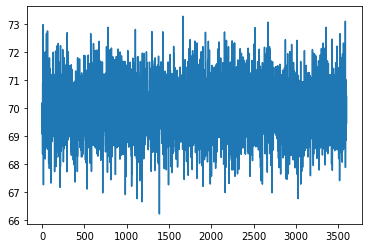


== plotting histogram for data sets sensor ==


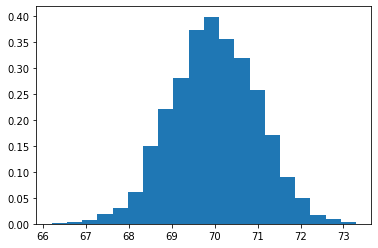


== plotting auto correlation for data sets sensor ==


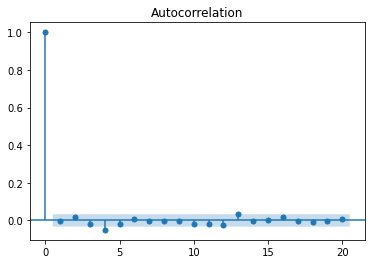

In [1]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

#temp sensor data from temp controlled environment
exp = DataExplorer()
exp.addFileNumericData("tmpsens.txt", 1, "sensor")
exp.plot("sensor")
exp.plotHist("sensor", False, True)
exp.plotAutoCorr("sensor", 20, .05)


The histogram looks like a normal distribution. As expected the auto correlation has peak at 0 lag and then it sharply falls to near zero values for othersr lags. Next we will run some test for normalcy. 


In [2]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

#temp sensor data from temp controlled environment
exp = DataExplorer()
exp.addFileNumericData("tmpsens.txt", 1, "sensor")
exp.testNormalShapWilk("sensor")


== adding numeric columns from a file ==
done

== doing shapiro wilks normalcy test for data sets sensor ==
result details:
{'pvalue': 0.5608612895011902, 'stat': 0.9995331168174744}

test result:
stat:   1.000
pvalue: 0.561
significance level: 0.050
probably gaussian


{'stat': 0.9995331168174744, 'pvalue': 0.5608612895011902}

With alpha of .05, the p value is wihin range. So the null hypothesis that that the data has normal distribution is valid. Based on the finding, you may decide to use Zscore based anomaly detection algorithm.

## Random with non parameteric distribution
Next we will work random data with non paramteric distribution. The data is incoming TCP SYN packet rate. Generally under DOS attack, the rate goes high outside normal range. You should run the following command in your notebook directory to generate the data

*./tsgen.py rnp  tsgen.properties  tsgen_sflood.properties > sflood.txt*




== adding numeric columns from a file ==
done

== plotting data for data sets sflood ==


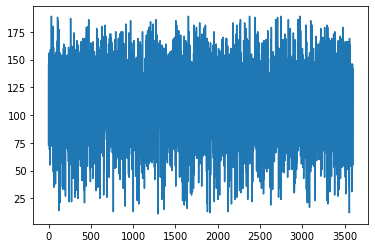


== plotting histogram for data sets sflood ==


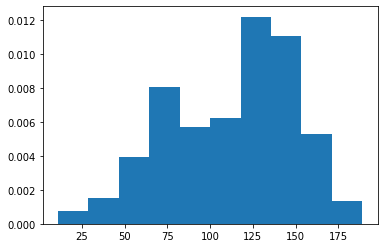


== plotting auto correlation for data sets sflood ==


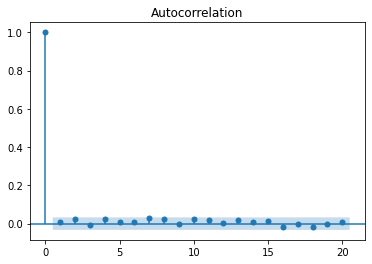

In [3]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sflood.txt", 1, "sflood")
exp.plot("sflood")
exp.plotHist("sflood", False, True)
exp.plotAutoCorr("sflood", 20, .05)

As expected, the distribution is not normal. The auto correlation has a peak at zero lag as expected for random data. Fpr rest of the lags the auto coreelation is neraly zero. The conclusion we draw is that we can not use anomaly detection algorithms that are based on the assumtion of data having a normal distribution. Next we will run normalcy test on the data, but this time we will use a different test.

In [1]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sflood.txt", 1, "sflood")
exp.testNormalJarqBera("sflood")


== adding numeric columns from a file ==
done

== doing ajrque bera normalcy test for data sets sflood ==
result details:
{   'kurtosis': 2.3312236427562123,
    'pvalue': 1.7633420322593389e-34,
    'skew': -0.3837362204725141,
    'stat': 155.44136454275852}

test result:
stat:   155.441
pvalue: 0.000
significance level: 0.050
probably not gaussian


{'stat': 155.44136454275852,
 'pvalue': 1.7633420322593389e-34,
 'skew': -0.3837362204725141,
 'kurtosis': 2.3312236427562123}

We have a very small pvalue, rejecting the null hypothesis. So it is confirmed that the data does not have a normal distribution as we saw visually in the histogram.Based on the finding, you may decide using robust Zscore or emirical distribution based anomaly detection algorithms.

## Auto regressive 
We wil use auto regressive data i.e a data value is a function of the past values. We will see how can detect auto regressive data through auto correlation and partial auto correlation. Generate data as below. The data is for blood pressure.

*./tsgen.py ar  tsgen.properties  tsgen_bp.properties > bp.txt*


== adding numeric columns from a file ==
done

== plotting data for data sets bp ==


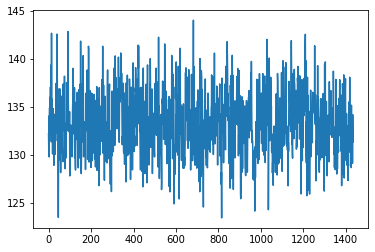


== plotting histogram for data sets bp ==


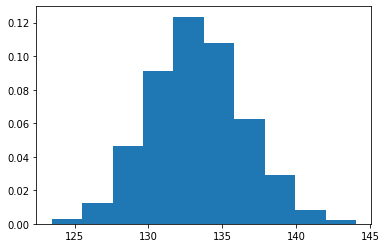

In [3]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.plot("bp")
exp.plotHist("bp", False, True)

The data distribution a central tendency. Let's do a normalcy test.


In [4]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.testNormalShapWilk("bp")


== adding numeric columns from a file ==
done

== doing shapiro wilks normalcy test for data sets bp ==
result details:
{'pvalue': 0.13621439039707184, 'stat': 0.9982330203056335}

test result:
stat:   0.998
pvalue: 0.136
significance level: 0.050
probably gaussian


{'stat': 0.9982330203056335, 'pvalue': 0.13621439039707184}

Turns out the data has a normal distribution. With a large pvalue we can not reject the null hypothesis of normal distribution. Let's try auto correlation and partial auto correlation.


== adding numeric columns from a file ==
done

== plotting auto correlation for data sets bp ==


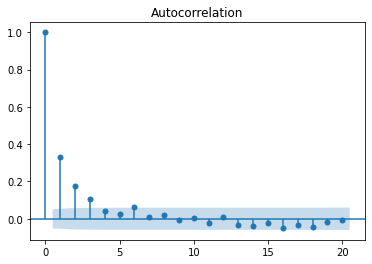


== plotting partial auto correlation for data sets bp ==


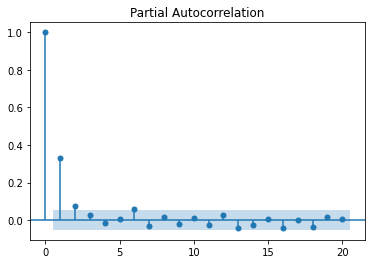

In [5]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.plotAutoCorr("bp", 20, .05)
exp.plotParAcf("bp", 20, .05)

Both auto correlation and partial auto correlation has significant peaks as non zero lags as expected from auto regressive data. Auto correlation has more  than 2 significant peaks, because past values beyond the second contribute to the current value indirectly, although data is is generated with second order auto regressive process. The partial auto correlation has 2 significant peaks, confirming it's a second order AR process. Based on the finding that the data is auto regressive, you may decide to use forecast based or markov chain based anomlay detection algorithms.


## Time series with cycle and trend
This is typical business data time series with s cycle, trend and a random component. Since the presence of cycle and trend make the data dependent on past data, it's auto regressive, albeit implicitly. The data is ecommerce hourly sales. We will start with plot and histogram. Generate data as follows

*./tsgen.py gen  tsgen.properties  tsgen_sale.properties > sale.txt*


== adding numeric columns from a file ==
done

== plotting data for data sets sale ==


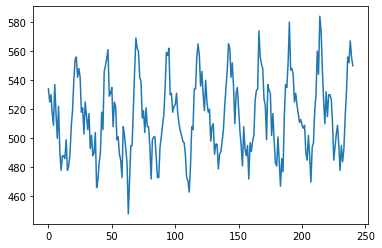


== plotting histogram for data sets sale ==


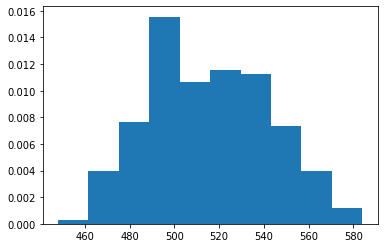

In [4]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sale.txt", 1, "sale")
exp.plot("sale")
exp.plotHist("sale", False, True)

We can clearly see the cycle and trend. Since the data has daily cycles, the cycle period is 24. We can also detect an upward trend and a random component. Nextion  we are going to look at auto correlation and partial auto correlation


== adding numeric columns from a file ==
done

== plotting auto correlation for data sets sale ==


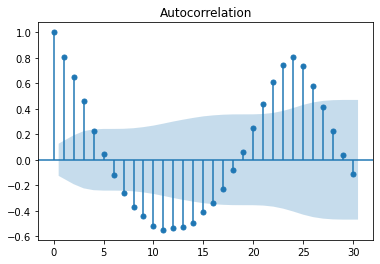


== plotting partial auto correlation for data sets sale ==


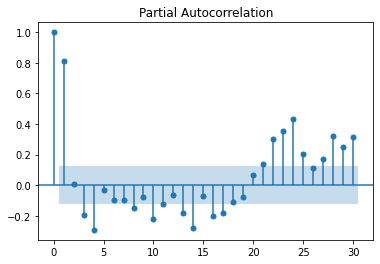

In [6]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sale.txt", 1, "sale")
exp.plotAutoCorr("sale", 30, .05)
exp.plotParAcf("sale", 30, .05)

As expected we find max negative auto correlation at lag 12 and max posiative auto correlation at lag 24. The partial auto correlation has largest leak at lag 1 which correspond to the trend. The next large peak at lag 24 corresponds to the cycle. Next we will at various components of the time series


== adding numeric columns from a file ==
done

== extracting trend, cycle and residue components of time series for data sets sale ==


/Users/pranab/Projects/bin/mlextra/daexp.py:854: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(data, model=model, freq=freq)


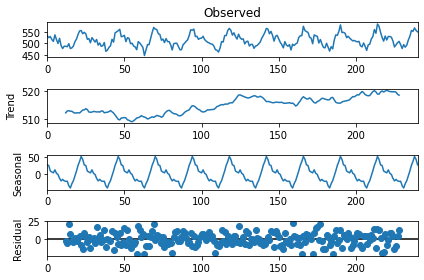

result details:
{   'residueMean': 0.053954475308654964,
    'residueStdDev': 8.999718738098444,
    'seasonalAmp': 46.690972222222214,
    'trendMean': 514.8868087557604,
    'trendSlope': 0.02874228395061746}


{'trendMean': 514.8868087557604,
 'trendSlope': 0.02874228395061746,
 'seasonalAmp': 46.690972222222214,
 'residueMean': 0.053954475308654964,
 'residueStdDev': 8.999718738098444}

In [10]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sale.txt", 1, "sale")
exp.getTimeSeriesComponents("sale","additive", 24, True, True)

The results are as expected. The components dont exactly match with what was used to generate data. For example, an increasing linear trend was used to generate data. We see a trend that is increasing but not exactly linear. Based on the finding that data has seasonality, you can use any anomaly detection algorithm for non auto regressive data with seasonality appropriately taken into account.

## Cross correlated data sets
When data sets are cross corelated, muti variate anomaly detection alogorithms are used. Given multiple data sets, we will find out if they are correlated or independent. The data set consists of motion sensor data from multiple sensors attached to rotating machinary. Generate data as follows starting with the reference data set

*./tsgen.py sine  tsgen.properties  tsgen_mach.properties > mach.txt*

Next we will generate 3 additional data sets. Two of them are correlated to the reference signal and the third one un correlated.

*./tsgen.py ccorr  tsgen.properties  tsgen_mach.properties > cmach.txt*

We are going to calculate Pearson correlation coefficient between each pair of time series. With 4 time series data, we six such pairs. 


In [2]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("cmach.txt", 1, 2, 3, 4, "value1", "value2", "value3", "value4")
exp.getPearsonCorr("value1", "value2")
exp.getPearsonCorr("value1", "value3")
exp.getPearsonCorr("value1", "value4")
exp.getPearsonCorr("value2", "value3")
exp.getPearsonCorr("value2", "value4")
exp.getPearsonCorr("value3", "value4")



== adding numeric columns from a file ==
done

== getting pearson correlation coefficient  for data sets value1 value2 ==
result details:
{'pvalue': 0.0, 'stat': 0.9973434748392095}

test result:
stat:   0.997
pvalue: 0.000
significance level: 0.050
probably correlated

== getting pearson correlation coefficient  for data sets value1 value3 ==
result details:
{'pvalue': 0.0, 'stat': -0.9977497272009086}

test result:
stat:   -0.998
pvalue: 0.000
significance level: 0.050
probably correlated

== getting pearson correlation coefficient  for data sets value1 value4 ==
result details:
{'pvalue': 0.9250911957169288, 'stat': 0.001717324579464768}

test result:
stat:   0.002
pvalue: 0.925
significance level: 0.050
probably uncorrelated

== getting pearson correlation coefficient  for data sets value2 value3 ==
result details:
{'pvalue': 0.0, 'stat': -0.9951721392631039}

test result:
stat:   -0.995
pvalue: 0.000
significance level: 0.050
probably correlated

== getting pearson correlation co

{'stat': -0.0008419803615853051, 'pvalue': 0.9632321777768058}

As expected time series 4 is uncorrelated with others. The rest are correated between themselves. So the first 3 time series will require multi variate ano,aly detection. Based on the finding, you may decide using Local Outlier Factor or Isolation Forest anomaly detection algorithms.

## Cross and auto correlated data
Cross correlated data coud also be auto correlayed or auto regressive. Both types of correlation can be tested as before. It turns that many anomaly detection algorithms for cross correlated data will also work if the data is auto regressive. For example, you can use markov chain based approach with muti variate state. Another soltion is multi variate forecast based techniques. 

If you are curious, you could plot auto currelation of the data seta in the previous sections. You will find that the data is auto regressive.


## Special cases
There are cases where the data does not fit any of the patterns discussed so far. One example is spiky data, which has fixed value except for spokes at near regular interval. You could treat it as data with seasonal cycle. However if the interval between spikes varies, then it won't work. 

Better solutn might be to do some feature enginering  and turn it into multivariate data, one variable being the gap with previous spike and the second the magnitude of the spike. Now you can use multivariate anomaly detection algorithms.


# Session 2
Independent univariate  data anomaly detection on Spark/Scala

## Service time anomaly detection for  a ticketing system
We will detect anomaly in servie time for a  ticketing system. We will do the following.
* Review and explore the data set
* Review of Robust Zscore algorithm
* Scala implementation of the Spark job
* Review of onfiguration
* Running spark job
* Review of output




== plotting data for data sets svcTime ==


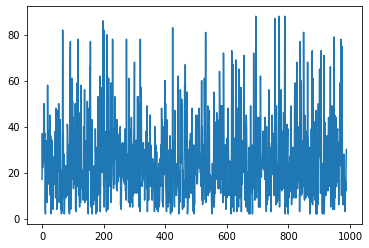


== plotting data for data sets svcTime ==


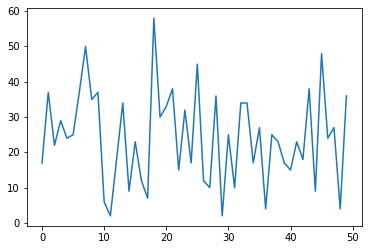


== doing shapiro wilks normalcy test for data sets svcTime ==
result details:
{'pvalue': 1.5421092213012366e-22, 'stat': 0.9194565415382385}

test result:
stat:   0.919
pvalue: 0.000
significance level: 0.050
probably not gaussian

== plotting histogram for data sets svcTime ==


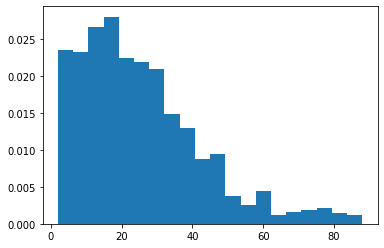

In [2]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

svTm = list()
for rec in fileRecGen("./input/ticket/train/tick_tr.txt", ","):
    if rec[0] == "JDG34JHD3H":
        svTm.append(float(rec[4]))
exp = DataExplorer()
exp.addListData(svTm, True, "svcTime")
exp.plot("svcTime")
exp.plotZoomed("svcTime",0, 50)
exp.testNormalShapWilk("svcTime")
exp.plotHist("svcTime", False, True)

To run the Spark job, we will use the [tutorial](https://github.com/pranab/beymani/blob/master/resource/issue_service_time_anomaly_detection_tutorial.txt). The script ticket.sh has everything we need to rin the Spark job. The configuration parameters are defined in ticket.conf

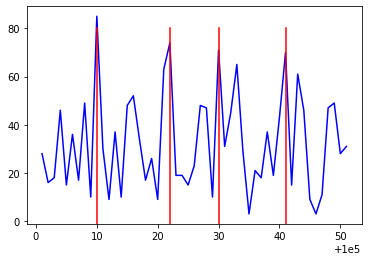

In [3]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

filt = lambda r : r[0] == "JDG34JHD3H"
fpath = "./output/ticket/olp/part-00000"
dvalues = list(map(lambda r : float(r[4]), fileFiltRecGen(fpath, filt)))
xvalues = list(map(lambda r : float(r[1]), fileFiltRecGen(fpath, filt)))
ofilt = lambda r : r[0] == "JDG34JHD3H" and r[6] == "O"
oxvalues = list(map(lambda r : float(r[1]), fileFiltRecGen(fpath, ofilt)))
plt.plot(xvalues, dvalues, "b")
for t in oxvalues:
    plt.axvline(t, 0, .9, color="r")
plt.show()




Points marked red are outliers, based on the threshold defined in the configuration. This dataset should have been treated as a multi variate anomaly detection problem. We have ignored 2  variables in the dataset, severity and priority. Service time is correlated with both of them. One takeway from this use case is that presence of time stamp in the data does not necessarily make it auto regressive. in this particular case, we just know that the time when an issue is filed is of no relevance. 

Take ways form this use case are
* Having a time stamp with data does not necessarity make it a time series
* If a data set has multiple variables,any possible correlation should be explored
* If significant cross corelation exists, mutivariate anomaly dtection algorithms should be used

## Server CPU usage anomaly detection
The data has weekly cycle i.e usage depends on the day of the week. The usage pattern during weekend is different from weekdays. Let's start with some exploratory analysis.
The challenge with this data set is that no clean data without outliers is available. As we will see a two step process is used for building the model. We build a model and identify the outliers. Then the outliers are removed and the model is rebuilt with clean data.

We will do the following
* Review and explore the data set
* Review of Zscore algorithm
* Review of onfiguration
* Review of output



== plotting data for data sets usage ==


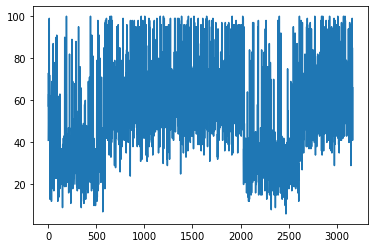


== plotting data for data sets usage ==


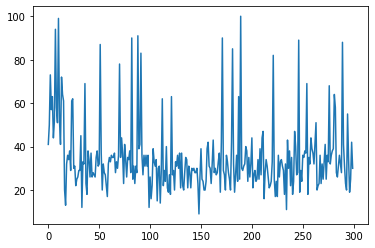


== plotting auto correlation for data sets usage ==


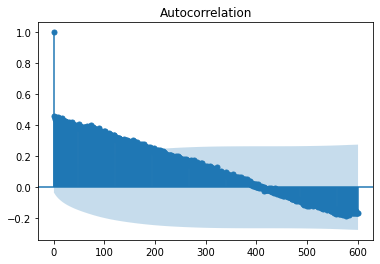


== doing shapiro wilks normalcy test for data sets d0usage ==
result details:
{'pvalue': 8.321286437684705e-10, 'stat': 0.9683891534805298}

test result:
stat:   0.968
pvalue: 0.000
significance level: 0.050
probably not gaussian

== plotting histogram for data sets d0usage ==


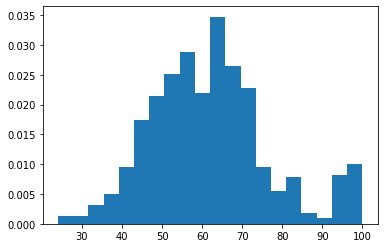


== doing shapiro wilks normalcy test for data sets d1usage ==
result details:
{'pvalue': 7.044629202895836e-12, 'stat': 0.9560906887054443}

test result:
stat:   0.956
pvalue: 0.000
significance level: 0.050
probably not gaussian

== plotting histogram for data sets d1usage ==


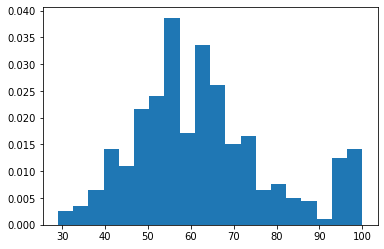


== doing shapiro wilks normalcy test for data sets d5usage ==
result details:
{'pvalue': 7.044629202895836e-12, 'stat': 0.9560906887054443}

test result:
stat:   0.956
pvalue: 0.000
significance level: 0.050
probably not gaussian

== plotting histogram for data sets d5usage ==


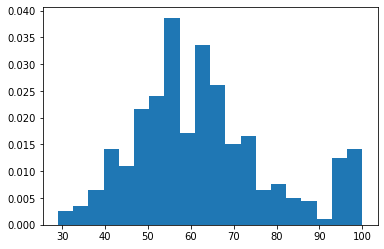

In [1]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

filt = lambda r : r[0] == "FO10SH65Y1"
fpath = "./input/olp/cusage.txt"
dvalues = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, filt)))
exp = DataExplorer()
exp.addListData(dvalues, True, "usage")
exp.plot("usage")
exp.plotZoomed("usage",0, 300)
exp.plotAutoCorr("usage", 600, .05)

dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 0
d0values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))
dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 1
d1values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))
dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 5
d5values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))


exp.addListData(d0values, True, "d0usage")
exp.addListData(d1values, True, "d1usage")
exp.addListData(d1values, True, "d5usage")
exp.testNormalShapWilk("d0usage")
exp.plotHist("d0usage", False, True)
exp.testNormalShapWilk("d1usage")
exp.plotHist("d1usage", False, True)
exp.testNormalShapWilk("d5usage")
exp.plotHist("d5usage", False, True)

We see different patterns for weekday and weekends. Usage level is higher for weekdays. The data has different distributions for weekends and week days, which is not same as seasonal cycles. The auto cirrelation reflects the distribution of the data. The distributions upper tails show the outliers. Next we will remove the outliers and then look at the distributions.


== plotting data for data sets usage ==


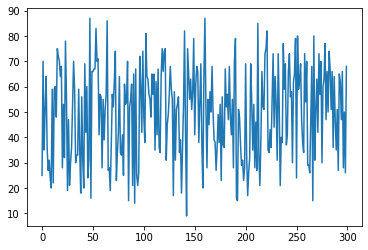


== plotting histogram for data sets d0usage ==


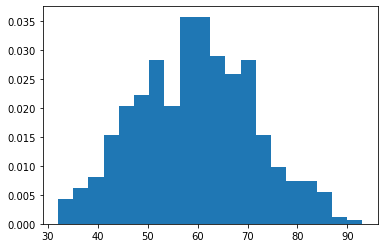


== doing shapiro wilks normalcy test for data sets d0usage ==
result details:
{'pvalue': 0.039342548698186874, 'stat': 0.9941598176956177}

test result:
stat:   0.994
pvalue: 0.039
significance level: 0.050
probably not gaussian

== plotting histogram for data sets d1usage ==


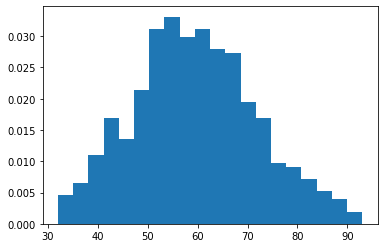


== doing shapiro wilks normalcy test for data sets d1usage ==
result details:
{'pvalue': 0.006957720965147018, 'stat': 0.9918078184127808}

test result:
stat:   0.992
pvalue: 0.007
significance level: 0.050
probably not gaussian

== plotting histogram for data sets d5usage ==


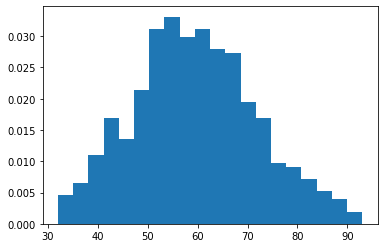


== doing shapiro wilks normalcy test for data sets d5usage ==
result details:
{'pvalue': 0.006957720965147018, 'stat': 0.9918078184127808}

test result:
stat:   0.992
pvalue: 0.007
significance level: 0.050
probably not gaussian


{'stat': 0.9918078184127808, 'pvalue': 0.006957720965147018}

In [4]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

filt = lambda r : r[0] == "FO10SH65Y1"
fpath = "./other/cusage.txt"
dvalues = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, filt)))
exp = DataExplorer()
exp.addListData(dvalues, True, "usage")
exp.plotZoomed("usage",0, 300)

dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 0
d0values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))
dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 1
d1values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))
dfilt = lambda r : r[0] == "FO10SH65Y1" and int(r[2])== 5
d5values = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, dfilt)))
exp.addListData(d0values, True, "d0usage")
exp.addListData(d1values, True, "d1usage")
exp.addListData(d1values, True, "d5usage")
exp.plotHist("d0usage", False, True)
exp.testNormalShapWilk("d0usage")
exp.plotHist("d1usage", False, True)
exp.testNormalShapWilk("d1usage")
exp.plotHist("d5usage", False, True)
exp.testNormalShapWilk("d5usage")

We have run the outlier detector, using the option to generate clean data without outliers. You will 
notice that the spikes at high usage are gone now in the distributions. Those spikes at upper tail of the 
distribution were outliers. The distributions look more gaussian now, all they all fail normalcy test 
with a critical value of .05
Now we can build a model with the clean data and use it for predicting outlier. Since they are near Gaussian,
we will still Zscore for outlier detection. 

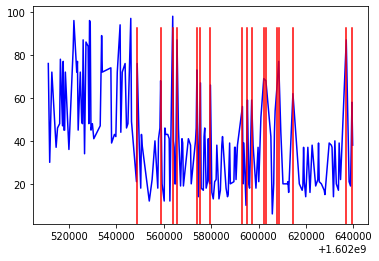

In [2]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

filt = lambda r : r[0] == "FO10SH65Y1"
fpath = "./output/cpu/olp/part-00000"
dvalues = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, filt)))
xvalues = list(map(lambda r : float(r[1]), fileFiltRecGen(fpath, filt)))
ofilt = lambda r : r[0] == "FO10SH65Y1" and r[5] == "O"
oxvalues = list(map(lambda r : float(r[1]), fileFiltRecGen(fpath, ofilt)))
plt.plot(xvalues, dvalues, "b")
for t in oxvalues:
    plt.axvline(t, 0, .9, color="r")
plt.show()

The red lines show the  outliers. The data happens to be for some weekend day, the average usage level is much lower than the level on the left side of the plot

Take aways from this use case are
* Sometimes your data for model building will have outliers.
* You can either use techniques are robust to outliers or clean up the data to 
remove the outliers before building the model
* We have followed the second approach
* Just because we have time series, it does not necessarity imply we have to use 
auto regression based algorithm.


# Session 3
Auto regressive univariate  data anomaly detection on Spark/Scala

## Rotating machinary fault detection with time series subsequence dissimilarity 
A rotating machinary has a frequency spectrum for normal condition. When there is a fault e.g due to bearing failure hight frequency components appear in the power spectrum.
* Review and explore the data set
* Review of subsequence dissimilatity algorithm
* Scala implementation of the Spark job
* Review of configuration
* Running spark job
* Review of output

We will start exploration data. We will look at raw data and auto correlation. Since the data is auto regressive, we expect significant peaks at non zero lags in auto correlation



== plotting data for data sets accl ==


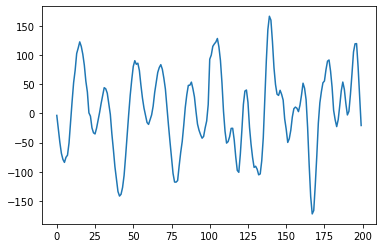


== plotting auto correlation for data sets accl ==


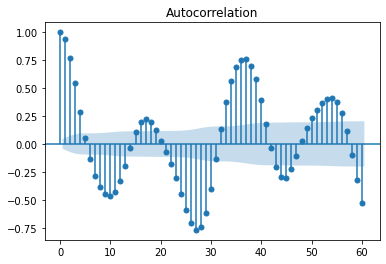

In [3]:
import sys
import os
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from util import *
from daexp import *

filt = lambda r : r[0] == "K87JG9F6"
fpath = "../beymani/input/vib/vib_pred.txt"
dvalues = list(map(lambda r : float(r[2]), fileFiltRecGen(fpath, filt)))
exp = DataExplorer()
exp.addListData(dvalues, True, "accl")
exp.plotZoomed("accl",900, 1100)
exp.plotAutoCorr("accl", 60, .05)



Next, we will look at anomay results. We will look at outlier score around where anomlay starts in the data. Then we will look at data with outlier marked red. Outliers in terms high frequency componenets were introduced half way through the test data, which is supported by the outlier plots

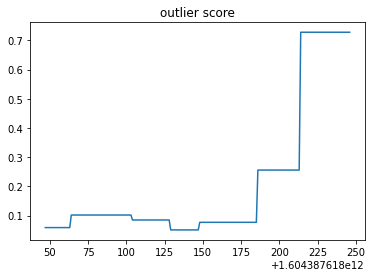

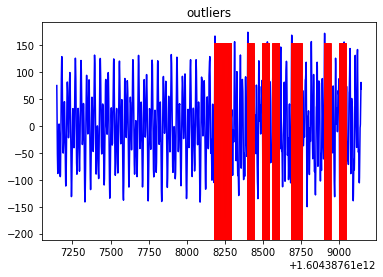

In [5]:
import sys
import os
from matplotlib import pyplot as plt
sys.path.append(os.path.abspath("../lib"))
from util import *

fpath = "../beymani/output/vib/part-00000"
mid = "K87JG9F6"
beg = 900
end = 1100
filt = lambda r : r[0] == mid
dvalues = list(map(lambda r : float(r[3]), fileFiltRecGen(fpath, filt)))
xvalues = list(map(lambda r : int(r[1]), fileFiltRecGen(fpath, filt)))
plt.plot(xvalues[beg:end], dvalues[beg:end])
plt.title("outlier score")
plt.show()

dvalues = list(map(lambda r : float(r[2]), fileFiltRecGen(fpath, filt)))
plt.plot(xvalues, dvalues, "b")
ofilt = lambda r : r[0] == mid and r[4] == "O"
oxvalues = list(map(lambda r : int(r[1]), fileFiltRecGen(fpath, ofilt)))
for t in oxvalues:
    plt.axvline(t, 0, .9, color="r")
    
plt.title("outliers")
plt.show()
